In [ ]:
pip install langchain langchain-experimental pyodbc pandas office365-rest-python-client openai langchain sqlalchemy matplotlib seaborn schedule groq pymssql

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!apt-get install -y unixodbc unixodbc-dev freetds-dev freetds-bin tdsodbc
!pip install pyodbc

# Step 2: Set up connection parameters
import pyodbc

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import pyodbc
import pandas as pd
import re
from office365.sharepoint.client_context import ClientContext
from office365.sharepoint.files.file import File
import pandas as pd
from io import StringIO
from office365.runtime.auth.user_credential import UserCredential
import smtplib
from email.message import EmailMessage
import os
from datetime import datetime, timedelta

In [ ]:
server = 'server ip'
database = 'database '
username = 'Username'
password = 'password'

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')
### there are fresh not acutare and locations are 001,005,009,025,MWH,PWH AND FWH
query = """
SELECT
    [ITEM CODE],
    MAX([ITEM_DESC]) AS [ITEM_DESC],
    MAX([DEPARTMENT]) AS [DEPARTMENT],

    SUM(CASE WHEN [BC_LOCATION] = '001' THEN [ITEM_SIH] ELSE 0 END) AS [001],
    SUM(CASE WHEN [BC_LOCATION] = '005' THEN [ITEM_SIH] ELSE 0 END) AS [005],
    SUM(CASE WHEN [BC_LOCATION] = '009' THEN [ITEM_SIH] ELSE 0 END) AS [009],
    SUM(CASE WHEN [BC_LOCATION] = '025' THEN [ITEM_SIH] ELSE 0 END) AS [025],
    SUM(CASE WHEN [BC_LOCATION] = 'MWH' AND [DEPARTMENT] NOT IN ('FROZEN','CHIILL','BAKERY','FRESH') THEN [ITEM_SIH] ELSE 0 END) AS [MWH],
    SUM(CASE WHEN [BC_LOCATION] = 'PWH' AND [DEPARTMENT] IN ('FROZEN','CHIILL','BAKERY') THEN [ITEM_SIH] ELSE 0 END) AS [PWH],
    SUM(CASE WHEN [BC_LOCATION] = 'FWH' AND [DEPARTMENT] = 'FRESH' THEN [ITEM_SIH] ELSE 0 END) AS [FWH]

FROM [AAA_ITEM_LISTING]
WHERE
    [ACTIVE_STATUS] = 'ACTIVE' AND
    [Inventory Sync] = 'ACTIVE' AND
    [PO_GRN_STAT] = 'ACTIVE' and [DEPARTMENT] <>'FRESH'
GROUP BY
    [ITEM CODE];


"""
stock = pd.read_sql(query, conn)

conn.close()

C:\Users\darshanaw\AppData\Local\Temp\ipykernel_7488\331565311.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock = pd.read_sql(query, conn)


In [ ]:
server = 'server ip'
database = 'database '
username = 'Username'
password = 'password'

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

query = """
SELECT
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    a.INVDET_TXNDATE,
    DATEPART(HOUR, a.INVDET_TIME) AS hour_,
    a.G1,
    COUNT(DISTINCT a.INVDET_INVNO) AS ORDERS,
    SUM(a.INVDET_AMOUNT) AS TotalAmount,
    SUM(a.INVDET_UNITQTY) AS TotalQTY
FROM
    [myPOS_DB].[dbo].[VIEW_ITEMWISESALES] a
WHERE
    a.INVDET_TXNDATE = CAST(GETDATE() AS DATE)
    AND a.INVDET_VOID = 0
    AND a.INVHED_CANCELED = 0
    AND a.INVHED_INVOICED = 1
    and DATEPART(HOUR, a.INVDET_TIME)<=DATEPART(HOUR, GETDATE())
    AND ISNULL(a.G1, '') NOT IN (
        'CHRISTMAS SPECIAL & HAMPERS','FRESH',
        'BARCODE',
        'CELESTE CAFÉ',
        'CONVENIENCE FEE',
        'DELIVERY FEE',
        'HAMPERS',
        'OTHER',
        'PACKING MATERIAL',
        'UBER DISCOUNTS',
        'NULL'
    )
GROUP BY
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    a.INVDET_TXNDATE,
    DATEPART(HOUR, a.INVDET_TIME),
    a.G1
ORDER BY
    a.INVDET_TXNDATE,
 DATEPART(HOUR, TRY_CAST(a.INVDET_TIME AS DATETIME)) ASC
"""
saletoday = pd.read_sql(query, conn)
conn.close()

C:\Users\darshanaw\AppData\Local\Temp\ipykernel_7488\1694674977.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  saletoday = pd.read_sql(query, conn)


server = 'server ip'
database = 'database '
username = 'Username'
password = 'password'

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

query = """
SELECT
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    DATEPART(HOUR, a.INVDET_TIME) AS hour_,
    a.G1,
    COUNT(DISTINCT a.INVDET_INVNO) AS avgORDERS,
    SUM(a.INVDET_AMOUNT) AS avgTotalAmount,
    SUM(a.INVDET_UNITQTY)  AS avgTotalQTY
FROM
    [myPOS_DB].[dbo].[VIEW_ITEMWISESALES] a
WHERE
    a.INVDET_TXNDATE = '2025-07-06'
    AND a.INVDET_VOID = 0
    AND a.INVHED_CANCELED = 0
    AND a.INVHED_INVOICED = 1
   and DATEPART(HOUR, a.INVDET_TIME)<=DATEPART(HOUR, GETDATE())
    AND ISNULL(a.G1, '') NOT IN (
        'CHRISTMAS SPECIAL & HAMPERS',
        'BARCODE',
        'CELESTE CAFÉ',
        'CONVENIENCE FEE',
        'DELIVERY FEE',
        'HAMPERS',
        'OTHER',
        'PACKING MATERIAL',
        'UBER DISCOUNTS',
        'NULL'
    )
GROUP BY
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    DATEPART(HOUR, a.INVDET_TIME),
    a.G1
ORDER BY
    a.INVDET_PROCODE,
DATEPART(HOUR, TRY_CAST(a.INVDET_TIME AS DATETIME)) ASC;

"""
avgsale = pd.read_sql(query, conn)

conn.close()

In [ ]:
server = 'server ip'
database = 'database '
username = 'Username'
password = 'password'

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

query = """
SELECT
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    DATEPART(HOUR, a.INVDET_TIME) AS hour_,
    a.G1,
    COUNT(DISTINCT a.INVDET_INVNO) * 1.0 / 7 AS avgORDERS,
    SUM(a.INVDET_AMOUNT) * 1.0 / 7 AS avgTotalAmount,
    SUM(a.INVDET_UNITQTY) * 1.0 / 7 AS avgTotalQTY
FROM
    [myPOS_DB].[dbo].[VIEW_ITEMWISESALES] a
WHERE
    a.INVDET_TXNDATE >= CAST(DATEADD(DAY, -7, GETDATE()) AS DATE)
    AND a.INVDET_TXNDATE < CAST(GETDATE() AS DATE) -- exclude today if needed
    AND a.INVDET_VOID = 0
    AND a.INVHED_CANCELED = 0
    AND a.INVHED_INVOICED = 1
   and DATEPART(HOUR, a.INVDET_TIME)<=DATEPART(HOUR, GETDATE())
    AND ISNULL(a.G1, '') NOT IN (
        'CHRISTMAS SPECIAL & HAMPERS','FRESH',
        'BARCODE',
        'CELESTE CAFÉ',
        'CONVENIENCE FEE',
        'DELIVERY FEE',
        'HAMPERS',
        'OTHER',
        'PACKING MATERIAL',
        'UBER DISCOUNTS',
        'NULL'
    )
GROUP BY
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    DATEPART(HOUR, a.INVDET_TIME),
    a.G1
ORDER BY
    a.INVDET_PROCODE,
DATEPART(HOUR, TRY_CAST(a.INVDET_TIME AS DATETIME)) ASC;

"""
avgsale = pd.read_sql(query, conn)

conn.close()

C:\Users\darshanaw\AppData\Local\Temp\ipykernel_7488\2415561967.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avgsale = pd.read_sql(query, conn)


In [ ]:
avgsale.to_csv('avgsale.csv', index=False)
saletoday.to_csv('saletoday.csv', index=False)
stock.to_csv('stock.csv', index=False)

In [ ]:
import os
from groq import Groq

client = Groq(api_key="gsk_GROQAPI")


In [ ]:
avgsale.columns

Index(['INVDET_PROCODE', 'INVDET_PRODESC', 'hour_', 'G1', 'avgORDERS',
       'avgTotalAmount', 'avgTotalQTY'],
      dtype='object')

In [ ]:
saletoday.columns

Index(['INVDET_PROCODE', 'INVDET_PRODESC', 'INVDET_TXNDATE', 'hour_', 'G1',
       'ORDERS', 'TotalAmount', 'TotalQTY'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming the data frames are already loaded as avgsale and saletoday

# Merge the two data frames on common keys (product code, hour, and group)
merged = pd.merge(avgsale, saletoday,
                 on=['INVDET_PROCODE', 'INVDET_PRODESC', 'hour_', 'G1'],
                 suffixes=('_avg', '_today'))

# Calculate differences for each metric
merged['orders_diff'] =  merged['avgORDERS']-merged['ORDERS']
merged['amount_diff'] =  merged['avgTotalAmount']-merged['TotalAmount']
merged['qty_diff'] =  merged['avgTotalQTY']-merged['TotalQTY']

# Create a summary data frame with the differences
sales_diff = merged[['INVDET_PROCODE', 'INVDET_PRODESC', 'hour_', 'G1',
                         'orders_diff', 'amount_diff', 'qty_diff']]

# You can sort by the largest differences if needed
sales_diff = sales_diff.sort_values(by='amount_diff', ascending=False)
#sales_diff.to_csv('sales_difference_results.csv', index=False)

In [ ]:
sales_diff

,INVDET_PROCODE,INVDET_PRODESC,hour_,G1,orders_diff,amount_diff,qty_diff
770,006598,DUNHILL BLUE 20 S - CEYLON TOBACCO - SKU,5,LIQUOR/TOBACCO,-0.571429,4857.142857,1.428571
27,000208,FRESH MILK FULL CREAM 1L - AMBEWELA - SK,12,BEVERAGE,5.285714,4642.857142,9.285714
767,006598,DUNHILL BLUE 20 S - CEYLON TOBACCO - SKU,1,LIQUOR/TOBACCO,1.142857,3885.714285,1.142857
53,000352,MILK POWDER 400G - RATTHI - SKU 000352,9,BEVERAGE,2.285714,3771.428571,3.142857
9,000186,EGGS L (PACK OF 10) - HAPPY HEN - SKU 00,7,BAKERY,4.142857,3640.000000,7.000000
...,...,...,...,...,...,...,...
562,004815,CHICKEN BREAST 2KG - MAXIES - SKU 004815,11,FROZEN,-2.285715,-7800.000000,-2.142858
561,004815,CHICKEN BREAST 2KG - MAXIES - SKU 004815,10,FROZEN,-2.285715,-8320.000000,-2.285715
775,006598,DUNHILL BLUE 20 S - CEYLON TOBACCO - SKU,11,LIQUOR/TOBACCO,-2.714286,-9228.571429,-2.714286
182,001309,ARALIYA PREMIUM KEERI SAMBA 5KG - SKU 00,11,GROCERY,-10.285715,-13371.428572,-10.285715


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from groq import Groq
import os

def generate_ai_insights(df, api_key, output_file='ai_sales_insights.txt'):
    # Ensure required columns exist
    required_columns = ['INVDET_PRODESC', 'amount_diff']
    for col in required_columns:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' missing in DataFrame.")

    # Calculate percentage difference if not already there
    if 'amount_diff_pct' not in df.columns and 'amount_diff' in df.columns:
        total_diff = df['amount_diff'].abs().sum()
        df['amount_diff_pct'] = (df['amount_diff'] / total_diff) * 100 if total_diff != 0 else 0

    # Identify top gainers and losers
    top_gains = df.nlargest(3, 'amount_diff')
    top_losses = df.nsmallest(3, 'amount_diff')

    # Create context for AI
    context = f"""
Today's Sales vs Historical Average:

📊 Total Sales Difference: ${df['amount_diff'].sum():,.2f}
📈 Average Percentage Change: {df['amount_diff_pct'].mean():.2f}% (if available)

🏆 Top 3 Gaining Products:
{top_gains[['INVDET_PRODESC', 'amount_diff']].to_markdown(index=False)}

🔻 Top 3 Losing Products:
{top_losses[['INVDET_PRODESC', 'amount_diff']].to_markdown(index=False)}
"""

    # Prompt
    prompt = """
Based on the above data, provide:
1. Top 3 insights
2. Key reasons for these trends
3. Actionable recommendations
Be concise and use bullet points where appropriate.
"""

    # Call LLM
    client = Groq(api_key=api_key)
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a business data analyst specialized in retail sales."},
            {"role": "user", "content": f"{context}\n\n{prompt}"}
        ],
        model="llama3-8b-8192",
        temperature=0.3,
        max_tokens=500
    )

    ai_content = response.choices[0].message.content.strip()

    # Combine for file output
    full_output = (
        "===== AI SALES INSIGHTS REPORT =====\n\n"
        + context.strip()
        + "\n\n================= ANALYSIS =================\n\n"
        + ai_content
        + "\n\n===========================================\n"
    )

    # Save to text file
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(full_output)

    print(f"✅ AI insights saved to: {output_file}")
    return full_output
def visualize_differences(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Top gains
    gains = df.nlargest(5, 'amount_diff')
    ax1.barh(gains['INVDET_PRODESC'], gains['amount_diff'], color='green')
    ax1.set_title('Top 5 Sales Gains')

    # Top losses
    losses = df.nsmallest(5, 'amount_diff')
    ax2.barh(losses['INVDET_PRODESC'], losses['amount_diff'], color='red')
    ax2.set_title('Top 5 Sales Losses')

    plt.tight_layout()
    plt.savefig('sales_insights.png')
    plt.show()

# Load your data
#sales_diff = pd.read_csv('sales_difference_results.csv')

# Verify columns
print("Columns in DataFrame:", sales_diff.columns.tolist())

# Run analysis
#visualize_differences(sales_diff)
groq_api_key = os.getenv("GROQ_API_KEY") or "GROQAPI"
insights = generate_ai_insights(sales_diff, groq_api_key)
print("\n🔍 AI-Generated Insights:")
print(insights)
# Save AI-generated insights to a text file
with open("ai_sales_insights.txt", "w", encoding="utf-8") as f:
    f.write(insights)

print("✅ AI insights saved to 'ai_sales_insights.txt'")

Columns in DataFrame: ['INVDET_PROCODE', 'INVDET_PRODESC', 'hour_', 'G1', 'orders_diff', 'amount_diff', 'qty_diff']
✅ AI insights saved to: ai_sales_insights.txt

🔍 AI-Generated Insights:
===== AI SALES INSIGHTS REPORT =====

Today's Sales vs Historical Average:

📊 Total Sales Difference: $-369,557.90
📈 Average Percentage Change: -0.07% (if available)

🏆 Top 3 Gaining Products:
| INVDET_PRODESC                           |   amount_diff |
|:-----------------------------------------|--------------:|
| DUNHILL BLUE 20 S - CEYLON TOBACCO - SKU |       4857.14 |
| FRESH MILK FULL CREAM 1L - AMBEWELA - SK |       4642.86 |
| DUNHILL BLUE 20 S - CEYLON TOBACCO - SKU |       3885.71 |

🔻 Top 3 Losing Products:
| INVDET_PRODESC                           |   amount_diff |
|:-----------------------------------------|--------------:|
| DRINKING WATER 500ML - CELESTE WATHURA - |     -17990    |
| ARALIYA PREMIUM KEERI SAMBA 5KG - SKU 00 |     -13371.4  |
| DUNHILL BLUE 20 S - CEYLON TOBACCO - SKU |

In [ ]:
import pandas as pd

# Assuming avgsale (7-day average) and saletoday DataFrames are loaded
# avgsale columns: INVDET_PROCODE, INVDET_PRODESC, hour_, G1, avgORDERS, avgTotalAmount, avgTotalQTY
# saletoday columns: INVDET_PROCODE, INVDET_PRODESC, hour_, G1, ORDERS, TotalAmount, TotalQTY

# 1. Aggregate both dataframes by product code (summing all hours)
avg_aggregated = avgsale.groupby(['INVDET_PROCODE', 'INVDET_PRODESC', 'G1']).agg({
    'avgORDERS': 'sum',
    'avgTotalAmount': 'sum',
    'avgTotalQTY': 'sum'
}).reset_index()

today_aggregated = saletoday.groupby(['INVDET_PROCODE', 'INVDET_PRODESC', 'G1']).agg({
    'ORDERS': 'sum',
    'TotalAmount': 'sum',
    'TotalQTY': 'sum'
}).reset_index()

# 2. Merge the aggregated data
comparison = pd.merge(avg_aggregated, today_aggregated,
                     on=['INVDET_PROCODE', 'INVDET_PRODESC', 'G1'])

# 3. Calculate differences
comparison['orders_diff'] = comparison['ORDERS'] - comparison['avgORDERS']
comparison['amount_diff'] = comparison['TotalAmount'] - comparison['avgTotalAmount']
comparison['qty_diff'] = comparison['TotalQTY'] - comparison['avgTotalQTY']

# 4. Calculate percentage changes
comparison['orders_diff_pct'] = (comparison['orders_diff'] / comparison['avgORDERS']) * 100
comparison['amount_diff_pct'] = (comparison['amount_diff'] / comparison['avgTotalAmount']) * 100
comparison['qty_diff_pct'] = (comparison['qty_diff'] / comparison['avgTotalQTY']) * 100

# 5. Add performance indicators
def get_performance(row):
    if row['amount_diff_pct'] < -20:
        return "Significant Decline"
    elif row['amount_diff_pct'] < 0:
        return "Slight Decline"
    elif row['amount_diff_pct'] > 20:
        return "Significant Increase"
    else:
        return "Normal Fluctuation"

comparison['performance'] = comparison.apply(get_performance, axis=1)

# 6. Sort by largest absolute difference
comparison['abs_amount_diff'] = comparison['amount_diff'].abs()
comparison = comparison.sort_values('abs_amount_diff', ascending=False)

# 7. Select final columns
result_columns = [
    'INVDET_PROCODE', 'INVDET_PRODESC', 'G1',
    'avgORDERS', 'ORDERS', 'orders_diff', 'orders_diff_pct',
    'avgTotalAmount', 'TotalAmount', 'amount_diff', 'amount_diff_pct',
    'avgTotalQTY', 'TotalQTY', 'qty_diff', 'qty_diff_pct',
    'performance'
]

final_comparison = comparison[result_columns]

# 8. Generate summary statistics
summary_stats = {
    'total_orders_avg': comparison['avgORDERS'].sum(),
    'total_orders_today': comparison['ORDERS'].sum(),
    'total_amount_avg': comparison['avgTotalAmount'].sum(),
    'total_amount_today': comparison['TotalAmount'].sum(),
    'total_qty_avg': comparison['avgTotalQTY'].sum(),
    'total_qty_today': comparison['TotalQTY'].sum(),
    'products_increased': len(comparison[comparison['amount_diff'] > 0]),
    'products_declined': len(comparison[comparison['amount_diff'] < 0]),
    'significant_changes': len(comparison[comparison['performance'].isin(["Significant Decline", "Significant Increase"])])
}

# Display results
print("=== PRODUCT PERFORMANCE COMPARISON ===")
print(f"Total Orders: Today {summary_stats['total_orders_today']} vs Avg {summary_stats['total_orders_avg']}")
print(f"Total Sales Amount: Today ${summary_stats['total_amount_today']:,.2f} vs Avg ${summary_stats['total_amount_avg']:,.2f}")
print(f"Total Quantity: Today {summary_stats['total_qty_today']} vs Avg {summary_stats['total_qty_avg']}")
print(f"\nProducts with Increased Sales: {summary_stats['products_increased']}")
print(f"Products with Declined Sales: {summary_stats['products_declined']}")
print(f"Products with Significant Changes: {summary_stats['significant_changes']}")

print("\n=== TOP 5 PRODUCTS BY SALES DIFFERENCE ===")
print(final_comparison.head(5).to_string(index=False))

# Export to CSV
final_comparison.to_csv('product_performance_comparison.csv', index=False)

=== PRODUCT PERFORMANCE COMPARISON ===
Total Orders: Today 1732 vs Avg 1675.1418489999999
Total Sales Amount: Today $1,159,892.59 vs Avg $1,125,601.63
Total Quantity: Today 2773.0 vs Avg 2462.7131579999996

Products with Increased Sales: 356
Products with Declined Sales: 246
Products with Significant Changes: 491

=== TOP 5 PRODUCTS BY SALES DIFFERENCE ===
INVDET_PROCODE                           INVDET_PRODESC             G1  avgORDERS  ORDERS  orders_diff  orders_diff_pct  avgTotalAmount  TotalAmount   amount_diff  amount_diff_pct  avgTotalQTY  TotalQTY   qty_diff  qty_diff_pct          performance
        004821  CHICKEN BREAST MEAT 500G - MAXIES - SKU         FROZEN  12.142853       1   -11.142853       -91.764703    18571.428567       1250.0 -17321.428567       -93.269231    14.857139       1.0 -13.857139    -93.269229  Significant Decline
        005160 DRINKING WATER 500ML - CELESTE WATHURA -       BEVERAGE   1.285713       1    -0.285713       -22.222144      920.000000      18

In [ ]:
import os
import pandas as pd
from groq import Groq


# Initialize Groq client (make sure your key is set)
client = Groq(api_key=os.getenv("GROQ_API_KEY", "GROQAPI"))  # Replace "gsk" with actual key if needed

# Build context for Groq to analyze
summary_context = f"""
Total Orders: Today = {summary_stats['total_orders_today']:.0f}, Avg = {summary_stats['total_orders_avg']:.0f}
Total Sales Amount: Today = ${summary_stats['total_amount_today']:,.2f}, Avg = ${summary_stats['total_amount_avg']:,.2f}
Total Quantity Sold: Today = {summary_stats['total_qty_today']:.0f}, Avg = {summary_stats['total_qty_avg']:.0f}

Products with Sales Increase: {summary_stats['products_increased']}
Products with Sales Decline: {summary_stats['products_declined']}
Significant Changes (±20%): {summary_stats['significant_changes']}

Top 3 Declining Products:
"""

# Get top 3 declining products by amount
declining_products = final_comparison.sort_values('amount_diff_pct').head(3)

for _, row in declining_products.iterrows():
    summary_context += f"\n- {row['INVDET_PRODESC']} (Category: {row['G1']}): " \
                       f"Today ${row['TotalAmount']:,.2f}, Avg ${row['avgTotalAmount']:,.2f} " \
                       f"({row['amount_diff_pct']:.1f}% drop)"

# === Generate Groq summary ===
try:
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": ""
            },
            {
                "role": "user",
                "content": f"Sales Performance Summary:\n{summary_context}\n\nPlease provide a concise and actionable insight."
            }
        ],
        model="llama3-70b-8192",
        temperature=0.4,
        max_tokens=800
    )

    groq_insight = response.choices[0].message.content
    full_output = (
        "===== AI SALES INSIGHTS REPORT =====\n\n"
        + context.strip()
        + "\n\n================= ANALYSIS =================\n\n"
        + ai_content
        + "\n\n===========================================\n"
    )
    print("\n=== AI-Generated Insight ===")
    print(groq_insight)

except Exception as e:
    print("\nError generating Groq insight:", str(e))
# Save AI-generated insights to a text file
with open("Significant_Sales_Decline.txt", "w", encoding="utf-8") as f:
    f.write(insights)

print("✅ AI insights saved to 'Significant_Sales_Decline.txt'")


Error generating Groq insight: name 'context' is not defined
✅ AI insights saved to 'Significant_Sales_Decline.txt'


In [ ]:
import os
import pandas as pd
from groq import Groq

# Initialize Groq client
client = Groq(api_key=os.getenv("GROQ_API_KEY", "GROQAPI"))  # Replace "gsk" with your actual key if needed

# Build context for Groq to analyze
summary_context = f"""
Total Orders: Today = {summary_stats['total_orders_today']:.0f}, Avg = {summary_stats['total_orders_avg']:.0f}
Total Sales Amount: Today = ${summary_stats['total_amount_today']:,.2f}, Avg = ${summary_stats['total_amount_avg']:,.2f}
Total Quantity Sold: Today = {summary_stats['total_qty_today']:.0f}, Avg = {summary_stats['total_qty_avg']:.0f}

Products with Sales Increase: {summary_stats['products_increased']}
Products with Sales Decline: {summary_stats['products_declined']}
Significant Changes (±20%): {summary_stats['significant_changes']}

Top 3 Declining Products:
"""

# Add top 3 declining products
declining_products = final_comparison.sort_values('amount_diff_pct').head(3)

for _, row in declining_products.iterrows():
    summary_context += f"\n- {row['INVDET_PRODESC']} (Category: {row['G1']}): " \
                       f"Today ${row['TotalAmount']:,.2f}, Avg ${row['avgTotalAmount']:,.2f} " \
                       f"({row['amount_diff_pct']:.1f}% drop)"

# === Generate Groq summary ===
try:
    prompt = """
Analyze the sales differences between today's sales and historical averages. Provide:
1. Top 3 insights about today's performance
2. Potential reasons for significant deviations (both positive and negative)
3. Recommendations for inventory or marketing adjustments
4. Any patterns you notice by time of day or product category

Present the analysis in clear bullet points with actionable recommendations.
"""

    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are an experienced retail sales analyst."
            },
            {
                "role": "user",
                "content": f"Context:\n{summary_context}\n\nQuestion:\n{prompt}"
            }
        ],
        model="llama3-70b-8192",
        temperature=0.3,
        max_tokens=1024
    )

    groq_insight = response.choices[0].message.content
    full_output = (
        "===== AI SALES INSIGHTS REPORT =====\n\n"
        + context.strip()
        + "\n\n================= ANALYSIS =================\n\n"
        + ai_content
        + "\n\n===========================================\n"
    )
    print("\n=== AI-Generated Insight ===")
    print(groq_insight)

except Exception as e:
    print("\nError generating Groq insight:", str(e))


with open("Top_3_Insights.txt", "w", encoding="utf-8") as f:
    f.write(insights)

print("✅ AI insights saved to 'ai_sales_insights.txt'")


Error generating Groq insight: name 'context' is not defined
✅ AI insights saved to 'ai_sales_insights.txt'


Visualization saved to 'sales_difference.png'


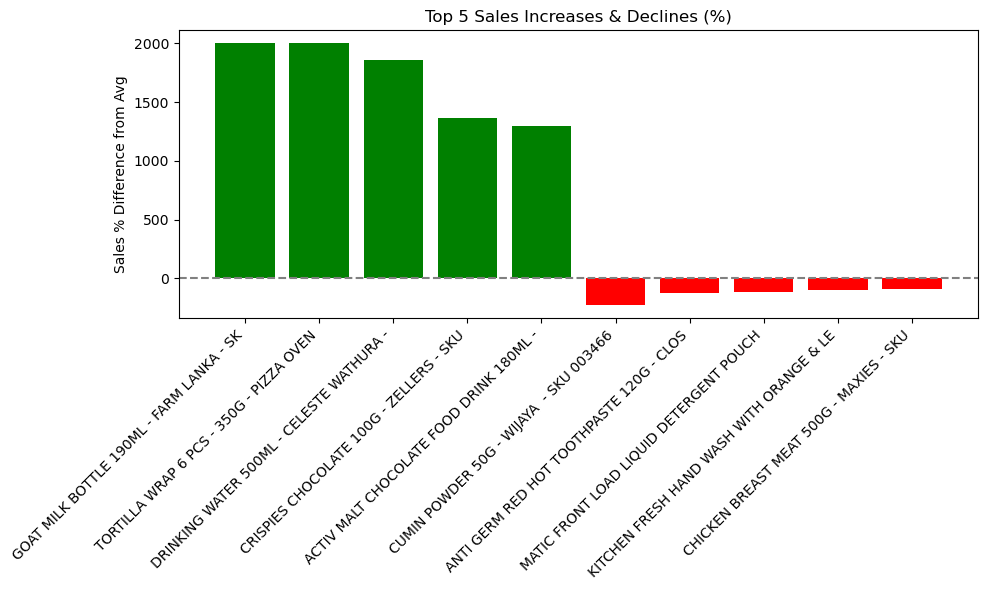

In [ ]:
# === Save your sales comparison CSV ===
sales_diff.to_csv('sales_difference_results.csv', index=False)

# === Generate Visualization (bar chart of top 5 increases & declines) ===
try:
    top_increase = final_comparison.sort_values('amount_diff_pct', ascending=False).head(5)
    top_decline = final_comparison.sort_values('amount_diff_pct').head(5)
    combined = pd.concat([top_increase, top_decline])

    plt.figure(figsize=(10, 6))
    colors = ['green' if x > 0 else 'red' for x in combined['amount_diff_pct']]
    plt.bar(combined['INVDET_PRODESC'], combined['amount_diff_pct'], color=colors)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 5 Sales Increases & Declines (%)')
    plt.ylabel('Sales % Difference from Avg')
    plt.tight_layout()
    plt.savefig('sales_difference.png')
    print("Visualization saved to 'sales_difference.png'")

except Exception as e:
    print("Error generating image:", str(e))

In [ ]:
server = 'server ip'
database = 'database '
username = 'Username'
password = 'password'

conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

query = """
SELECT
    a.INVDET_PROCODE,
    a.INVDET_LOCCODE,
    a.INVDET_PRODESC,
    a.G1,
    COUNT(DISTINCT a.INVDET_INVNO) * 1.0 / 7 AS avgORDERS,
    SUM(a.INVDET_AMOUNT) * 1.0 / 7 AS avgTotalAmount,
    SUM(a.INVDET_UNITQTY) * 1.0 / 7 AS avgTotalQTY
FROM
    [myPOS_DB].[dbo].[VIEW_ITEMWISESALES] a
WHERE
    a.INVDET_TXNDATE >= CAST(DATEADD(DAY, -7, GETDATE()) AS DATE)
    AND a.INVDET_TXNDATE < CAST(GETDATE() AS DATE) -- exclude today if needed
    AND a.INVDET_VOID = 0
    AND a.INVHED_CANCELED = 0
    AND a.INVHED_INVOICED = 1
   and DATEPART(HOUR, a.INVDET_TIME)>=DATEPART(HOUR, GETDATE())
    AND ISNULL(a.G1, '') NOT IN (
        'CHRISTMAS SPECIAL & HAMPERS','FRESH',
        'BARCODE',
        'CELESTE CAFÉ',
        'CONVENIENCE FEE',
        'DELIVERY FEE',
        'HAMPERS',
        'OTHER',
        'PACKING MATERIAL',
        'UBER DISCOUNTS',
        'NULL'
    )
GROUP BY
    a.INVDET_PROCODE,
    a.INVDET_PRODESC,
    a.G1,
    a.INVDET_LOCCODE
ORDER BY
    a.INVDET_PROCODE ASC;

"""
tobeavgsale = pd.read_sql(query, conn)

conn.close()

C:\Users\darshanaw\AppData\Local\Temp\ipykernel_7488\830667233.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tobeavgsale = pd.read_sql(query, conn)


In [ ]:
tobeavgsale.columns

Index(['INVDET_PROCODE', 'INVDET_LOCCODE', 'INVDET_PRODESC', 'G1', 'avgORDERS',
       'avgTotalAmount', 'avgTotalQTY'],
      dtype='object')

In [ ]:
tobeavgsale.head(5)

,INVDET_PROCODE,INVDET_LOCCODE,INVDET_PRODESC,G1,avgORDERS,avgTotalAmount,avgTotalQTY
0,000001,005,ADULT CHICKEN VEGETABLE 3KG - PEDIGREE -,HOUSEHOLD,0.285714,1371.428571,0.285714
1,000001,009,ADULT CHICKEN VEGETABLE 3KG - PEDIGREE -,HOUSEHOLD,0.285714,1371.428571,0.285714
2,000001,025,ADULT CHICKEN VEGETABLE 3KG - PEDIGREE -,HOUSEHOLD,0.142857,685.714285,0.142857
3,000002,001,ADULT OCEAN FISH 480G - WHISKAS - SKU 00,HOUSEHOLD,0.285714,500.000000,0.285714
4,000002,005,ADULT OCEAN FISH 480G - WHISKAS - SKU 00,HOUSEHOLD,0.857142,1500.000000,0.857142


In [ ]:
stock.head(5)

,ITEM CODE,ITEM_DESC,DEPARTMENT,001,005,009,025,MWH,PWH,FWH
0,000001,ADULT CHICKEN VEGETABLE 3KG - PEDIGREE - SKU 0...,HOUSEHOLD,8.0,2.0,3.0,2.0,0.0,0.0,0.0
1,000002,ADULT OCEAN FISH 480G - WHISKAS - SKU 000002,HOUSEHOLD,6.0,14.0,12.0,13.0,3.0,0.0,0.0
2,000003,ADULT TUNA 480G - WHISKAS - SKU 000003,HOUSEHOLD,23.0,23.0,26.0,14.0,0.0,0.0,0.0
3,000007,ANLENE LOW FAT MILK POWDER 400G - ANCHOR - SKU...,BEVERAGE,9.0,6.0,6.0,6.0,0.0,0.0,0.0
4,000011,APPLE JUICE 1L - FONTANA - SKU 000011,BEVERAGE,0.0,0.0,0.0,16.0,0.0,0.0,0.0


In [ ]:
# Melt the location columns into long format
long_df =  stock.drop(columns=['MWH', 'PWH', 'FWH'], errors='ignore')


long_df = long_df.melt(
    id_vars=['ITEM CODE', 'ITEM_DESC', 'DEPARTMENT'],
    value_vars=['001', '005', '009', '025'],
    var_name='Location',
    value_name='Qty'
)
long_df = long_df[long_df['ITEM CODE'].str.match(r'^\d')]
print(long_df)

      ITEM CODE                                          ITEM_DESC DEPARTMENT  \
0        000001  ADULT CHICKEN VEGETABLE 3KG - PEDIGREE - SKU 0...  HOUSEHOLD   
1        000002       ADULT OCEAN FISH 480G - WHISKAS - SKU 000002  HOUSEHOLD   
2        000003             ADULT TUNA 480G - WHISKAS - SKU 000003  HOUSEHOLD   
3        000007  ANLENE LOW FAT MILK POWDER 400G - ANCHOR - SKU...   BEVERAGE   
4        000011              APPLE JUICE 1L - FONTANA - SKU 000011   BEVERAGE   
...         ...                                                ...        ...   
11043    007596  STRAWBERRY & GUAVA FRUIT DRINK - AMERICAN JOOZ...   BEVERAGE   
11044    007597   MIXED FRUIT DRINK - AMERICAN JOOZY - SKU  007597   BEVERAGE   
11045    007598          CHICKEN IN BRINE 400G - TESS - SKU 007598    GROCERY   
11046    007599  YELLOW FIN TUNA IN CHILLI OIL 180G - TESS - SK...    GROCERY   
11047    007600     KEERI SAMBA RICE 5KG - LATH SAHAL - SKU 007600    GROCERY   

      Location   Qty  
0   

In [ ]:
long_df.columns

Index(['ITEM CODE', 'ITEM_DESC', 'DEPARTMENT', 'Location', 'Qty'], dtype='object')

In [ ]:
stock['TotalStock'] = stock[['001','005','009','025','MWH', 'PWH', 'FWH']].sum(axis=1)
stock.head(5)

,ITEM CODE,ITEM_DESC,DEPARTMENT,001,005,009,025,MWH,PWH,FWH,TotalStock
0,000001,ADULT CHICKEN VEGETABLE 3KG - PEDIGREE - SKU 0...,HOUSEHOLD,8.0,2.0,3.0,2.0,0.0,0.0,0.0,15.0
1,000002,ADULT OCEAN FISH 480G - WHISKAS - SKU 000002,HOUSEHOLD,6.0,14.0,12.0,13.0,3.0,0.0,0.0,48.0
2,000003,ADULT TUNA 480G - WHISKAS - SKU 000003,HOUSEHOLD,23.0,23.0,26.0,14.0,0.0,0.0,0.0,86.0
3,000007,ANLENE LOW FAT MILK POWDER 400G - ANCHOR - SKU...,BEVERAGE,9.0,6.0,6.0,6.0,0.0,0.0,0.0,27.0
4,000011,APPLE JUICE 1L - FONTANA - SKU 000011,BEVERAGE,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0


In [ ]:
stock =  stock.drop(columns=['001','005','009','025','MWH', 'PWH', 'FWH'])
stock.head(5)

,ITEM CODE,ITEM_DESC,DEPARTMENT,TotalStock
0,000001,ADULT CHICKEN VEGETABLE 3KG - PEDIGREE - SKU 0...,HOUSEHOLD,15.0
1,000002,ADULT OCEAN FISH 480G - WHISKAS - SKU 000002,HOUSEHOLD,48.0
2,000003,ADULT TUNA 480G - WHISKAS - SKU 000003,HOUSEHOLD,86.0
3,000007,ANLENE LOW FAT MILK POWDER 400G - ANCHOR - SKU...,BEVERAGE,27.0
4,000011,APPLE JUICE 1L - FONTANA - SKU 000011,BEVERAGE,16.0


In [ ]:
stock.columns

Index(['ITEM CODE', 'ITEM_DESC', 'DEPARTMENT', 'TotalStock'], dtype='object')

In [ ]:
# Step 1: Prepare and merge data
merged_df = long_df.merge(
    tobeavgsale,
    left_on=['ITEM CODE', 'Location'],
    right_on=['INVDET_PROCODE', 'INVDET_LOCCODE'],
    how='left'
)

# Step 2: Filter where current stock is less than average historical sales
understocked = merged_df[merged_df['Qty'] < merged_df['avgTotalQTY']]

# Optional: Clean and rename for Groq context
understocked = understocked[['ITEM CODE', 'ITEM_DESC', 'DEPARTMENT', 'Location', 'Qty', 'avgTotalQTY']]
understocked['Qty_Diff'] = understocked['avgTotalQTY'] - understocked['Qty']
understocked = understocked.sort_values('Qty_Diff', ascending=False)

# Preview
print(understocked.head())


     ITEM CODE                                          ITEM_DESC DEPARTMENT  \
3257    001557     KOTTU MEE HOT & SPICY 80G - PRIMA - SKU 001557    GROCERY   
6046    001737  CHOCOLATE MILK PACK 180ML - HIGHLAND - SKU 001737   BEVERAGE   
6735    004452  KING COCONUT WATER 200ML - KICO SILVERMILL - S...   BEVERAGE   
6835    004699                       COCA COLA 1.05L - SKU 004699   BEVERAGE   
550     001899     TIPI TIP ONION MEGA 50G - USWATTE - SKU 001899    GROCERY   

     Location  Qty  avgTotalQTY   Qty_Diff  
3257      005 -5.0    17.714285  22.714285  
6046      009  0.0    14.142857  14.142857  
6735      009  0.0    12.857142  12.857142  
6835      009  0.0    11.714285  11.714285  
550       001 -7.0     4.571428  11.571428  


In [ ]:
# Format into a text block for Groq input
summary_context = "The following products are understocked compared to their historical average sales:\n\n"

for _, row in understocked.head(10).iterrows():  # Top 10 for clarity
    summary_context += (
        f"- {row['ITEM_DESC']} (Code: {row['ITEM CODE']}, Dept: {row['DEPARTMENT']}) at Location {row['Location']}: "
        f"Stock = {row['Qty']}, Avg Demand = {row['avgTotalQTY']} → Short by {row['Qty_Diff']:.0f} units\n"
    )
from groq import Groq

client = Groq(api_key=os.getenv("GROQ_API_KEY", "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"))

prompt = """
Analyze the stock shortages compared to historical average demand.

Provide:
1. Key risks of current understocking (e.g., lost sales, regional imbalance)
2. Recommendations (e.g., inter-location transfers, emergency restocking)
3. Prioritized actions for the top products/locations

Keep it brief, clear, and action-oriented.
"""

response = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a smart retail operations analyst."},
        {"role": "user", "content": f"Context:\n{summary_context}\n\nTask:\n{prompt}"}
    ],
    model="llama3-70b-8192",
    temperature=0.3,
    max_tokens=800
)

# Extract AI content
ai_analysis = response.choices[0].message.content.strip()

# === Step 4: Combine Full Output ===
full_output = (
    "===== AI STOCK SHORTAGE ANALYSIS REPORT =====\n\n"
    + summary_context.strip()
    + "\n\n================= AI ANALYSIS =================\n\n"
    + ai_analysis
    + "\n\n==============================================\n"
)

# === Step 5: Save to File ===
output_path = "understock_analysis.txt"
with open(output_path, "w", encoding="utf-8") as f:
    f.write(full_output)

# === Step 6: Print Preview ===
print("\n=== AI-Generated Stock Action Plan ===\n")
print(ai_analysis)
print(f"\n✅ Saved to: {output_path}")



=== AI-Generated Stock Action Plan ===

**Analysis and Recommendations**

**Key Risks:**

1. **Lost Sales**: Understocking in high-demand products may lead to lost sales, negatively impacting revenue and customer satisfaction.
2. **Regional Imbalance**: Disparities in stock levels across locations may create regional imbalances, affecting sales and customer loyalty.

**Recommendations:**

1. **Emergency Restocking**: Prioritize restocking of top-selling products with high demand, such as KOTTU MEE HOT & SPICY 80G (SKU 001557) and CHOCOLATE MILK PACK 180ML (SKU 001737).
2. **Inter-Location Transfers**: Transfer stock from locations with surplus to locations with shortages, where possible, to minimize lost sales and optimize inventory.
3. **Inventory Replenishment**: Review and adjust inventory replenishment strategies to prevent future stockouts.

**Prioritized Actions:**

**Top Products/Locations:**

1. **KOTTU MEE HOT & SPICY 80G (SKU 001557) at Location 005**: Restock 23 units to me

In [ ]:
# Format into a text block for Groq input
summary_context = "The following products are understocked compared to their historical average sales:\n\n"

for _, row in understocked.head(10).iterrows():  # Top 10 for clarity
    summary_context += (
        f"- {row['ITEM_DESC']} (Code: {row['ITEM CODE']}, Dept: {row['DEPARTMENT']}) at Location {row['Location']}: "
        f"Stock = {row['Qty']}, Avg Demand = {row['avgTotalQTY']} → Short by {row['Qty_Diff']:.0f} units\n"
    )
from groq import Groq

client = Groq(api_key=os.getenv("GROQ_API_KEY", "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"))

prompt = """
You are a retail supply chain analyst. Based on the provided data of understocked products by location, generate a detailed action plan in a structured, table-like format.

For each row, provide:
- ITEM CODE
- ITEM_DESC
- DEPARTMENT
- LOCATION
- CURRENT_QTY
- AVG_DEMAND
- QTY_SHORTAGE
- ACTION (e.g., restock, transfer, monitor)
- ACTION_REASON (short explanation)

Respond only in comma-separated format (CSV-style). Do not add any explanation or text outside the table.
"""

response = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a smart retail operations analyst."},
        {"role": "user", "content": f"Context:\n{summary_context}\n\nTask:\n{prompt}"}
    ],
    model="llama3-70b-8192",
    temperature=0.3,
    max_tokens=800
)

print("\n=== AI-Generated Stock Action Plan ===")
print(response.choices[0].message.content)

# Optional: Save result
with open("understock_Action_Plan.txt", "w") as f:
    f.write(response.choices[0].message.content)



=== AI-Generated Stock Action Plan ===
"ITEM CODE","ITEM_DESC","DEPARTMENT","LOCATION","CURRENT_QTY","AVG_DEMAND","QTY_SHORTAGE","ACTION","ACTION_REASON"
"001557","KOTTU MEE HOT & SPICY 80G","GROCERY","005",-5.0,17.714285,23,"Restock","Meet historical demand to avoid stockout"
"001737","CHOCOLATE MILK PACK 180ML","BEVERAGE","009",0.0,14.142857,14,"Restock","Meet historical demand to avoid stockout"
"004452","KING COCONUT WATER 200ML","BEVERAGE","009",0.0,12.857142,13,"Restock","Meet historical demand to avoid stockout"
"004699","COCA COLA 1.05L","BEVERAGE","009",0.0,11.714285,12,"Restock","Meet historical demand to avoid stockout"
"001899","TIPI TIP ONION MEGA 50G","GROCERY","001",-7.0,4.571428,12,"Restock","Meet historical demand to avoid stockout"
"004768","MACKEREL 80G","HOUSEHOLD","001",-6.0,4.571428,11,"Restock","Meet historical demand to avoid stockout"
"001002","PAPER SERVIETTES 100 S (1 PLY)","HOUSEHOLD","001",-8.0,1.571428,10,"Restock","Meet historical demand to avoid stockou

In [ ]:
# 1. Group demand per product (across locations)
avg_demand = tobeavgsale.groupby(['INVDET_PROCODE', 'INVDET_PRODESC', 'G1'], as_index=False)['avgTotalQTY'].sum()
avg_demand.rename(columns={
    'INVDET_PROCODE': 'ITEM CODE',
    'INVDET_PRODESC': 'ITEM_DESC',
    'G1': 'DEPARTMENT',
    'avgTotalQTY': 'TotalAvgDemand'
}, inplace=True)

# 2. Merge with stock on ITEM CODE
stock_check = stock.merge(avg_demand, on=['ITEM CODE', 'ITEM_DESC', 'DEPARTMENT'], how='left')

# 3. Filter where current stock < demand
understocked_for_purchase = stock_check[stock_check['TotalStock'] < stock_check['TotalAvgDemand']].copy()
understocked_for_purchase['Shortage'] = stock_check['TotalAvgDemand'] - stock_check['TotalStock']


In [ ]:
# Format a CSV-style string for Groq
csv_input = "ITEM CODE,ITEM_DESC,DEPARTMENT,TotalStock,TotalAvgDemand,Shortage\n"
for _, row in understocked_for_purchase.iterrows():
    csv_input += f"{row['ITEM CODE']},{row['ITEM_DESC']},{row['DEPARTMENT']},{row['TotalStock']},{row['TotalAvgDemand']},{row['Shortage']:.0f}\n"


In [ ]:
from groq import Groq

client = Groq(api_key=os.getenv("GROQ_API_KEY", "GROQAPI"))

prompt = """
You are a supply chain procurement assistant. Based on the data of understocked products, generate a purchase recommendation list.

For each row, return:
- ITEM CODE
- ITEM_DESC
- DEPARTMENT
- CURRENT_STOCK
- REQUIRED_STOCK
- SHORTAGE
- ACTION (e.g., Purchase)
- PRIORITY (High / Medium / Low based on shortage size)
- ACTION_REASON (why action is needed)

Respond only in comma-separated format (CSV-style).
Do not include extra explanations outside the table.
"""

response = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are an experienced purchasing analyst."},
        {"role": "user", "content": f"Data:\n{csv_input}\n\n{prompt}"}
    ],
    model="llama3-70b-8192",
    temperature=0.3,
    max_tokens=2048
)

groq_purchase_recommendations = response.choices[0].message.content


✅ Purchase recommendation saved to 'purchase_recommendations.csv'
📊 Shortage chart saved as 'purchase_shortage_visualization.png'


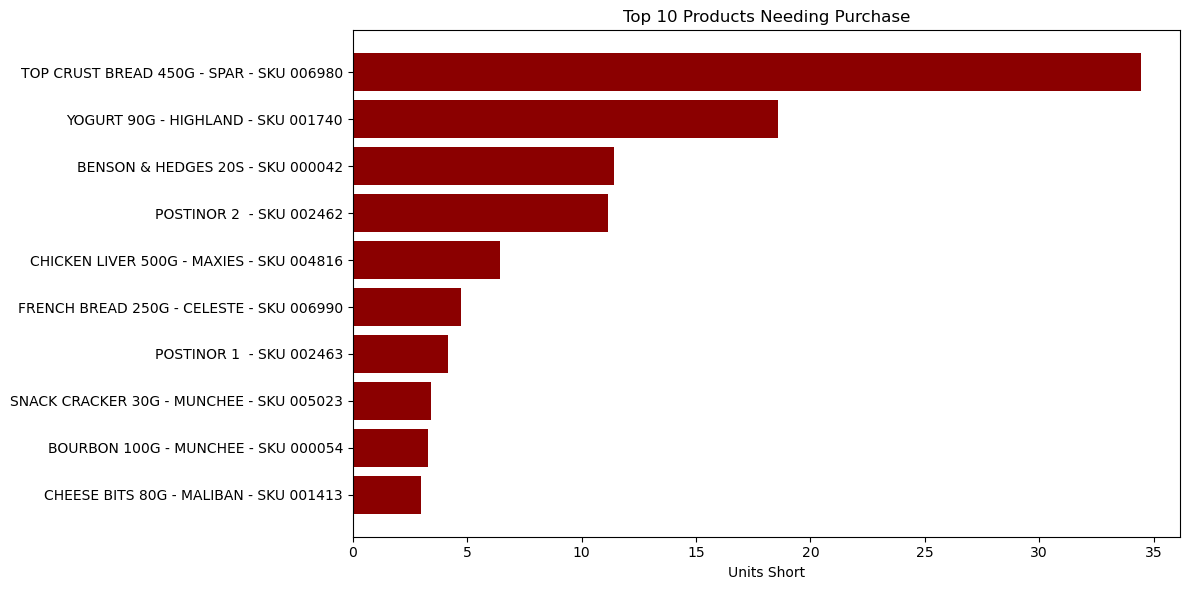

In [ ]:
# Save to CSV
output_file = "purchase_recommendations.csv"
with open(output_file, "w") as f:
    f.write(groq_purchase_recommendations)

print(f"✅ Purchase recommendation saved to '{output_file}'")

# Optional: Visualization
import matplotlib.pyplot as plt

top_shortage = understocked_for_purchase.sort_values("Shortage", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_shortage['ITEM_DESC'], top_shortage['Shortage'], color='darkred')
plt.gca().invert_yaxis()
plt.title("Top 10 Products Needing Purchase")
plt.xlabel("Units Short")
plt.tight_layout()
plt.savefig("Might out of stock tommoro morning or already oos.png")
print("📊 Shortage chart saved as 'purchase_shortage_visualization.png'")


In [ ]:
import smtplib
import os
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

# === Email Configuration ===
SMTP_SERVER = "smtp.office365.com"
SMTP_PORT = 587
EMAIL_ADDRESS = "YOUREMAIL.lk"
EMAIL_PASSWORD = "PASSWORD"

to_email = ["RECIVER1.lk", "RECEIVER2.lk"]
cc_emails = ["CC1.lk", "CC2.lk"]

# === AI Insights Files ===
insight_files = [

    "Top_3_Insights.txt",
    "Significant_Sales_Decline.txt",
    "understock_analysis.txt"
]
    #, "understock_Action_Plan.txt",    "ai_sales_insights.txt",
# === Read and Combine AI Insight Texts ===
ai_insights_text = ""
for path in insight_files:
    if os.path.exists(path):
        try:
            with open(path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
                ai_insights_text += f"<h4>📄 {os.path.basename(path)}</h4>\n"
                ai_insights_text += f"<pre style='white-space: pre-wrap; font-family: monospace; background-color: #f4f4f4; padding: 10px; border: 1px solid #ccc;'>{content}</pre>\n"
        except Exception as e:
            ai_insights_text += f"<p style='color:red;'>⚠️ Could not read {path}: {e}</p>\n"
    else:
        ai_insights_text += f"<p style='color:red;'>⚠️ File not found: {path}</p>\n"

# === Email Message Setup ===
msg = MIMEMultipart('related')
msg['From'] = EMAIL_ADDRESS
msg['To'] = ", ".join(to_email)
msg['Cc'] = ", ".join(cc_emails)
msg['Subject'] = "📊 AI-Driven Sales and Stock Insights – Compared to last 7 days "

# === Email Body (HTML) ===
html_body = f"""
<html>
  <body>
    <p>Dear ALL,</p>
    <p>There are the reasons we got from BI end the sale reduction reasons..</p>
    <p>we still don't know what are the items with payment issues , they might include here as purchase_recommendations list .</p>
    <p>after discuss with Mr Eranga we dont concider Fresh items because the stock is incorrect.</p>

    <p>Below are the key analytics and insights compared to last 7 days :</p>
    <ul>
        <li>📊 <b>Sales Difference</b> vs historical average</li>
        <li>📈 <b>Sales Insights</b> (Top Gainers/Losers)</li>
        <li>🚫 <b>OOS items with high demand</b></li>
        <li>🧠 <b>AI-Generated Recommendations</b> (see below)</li>
    </ul>

    <h3>📊 Sales Difference</h3>
    <img src="cid:sales_diff_img"><br><br>

    <h3>📈 Sales Insights</h3>
    <img src="cid:sales_insights_img"><br><br>

    <h3>🚫 Top OOS Items with Demand</h3>
    <img src="cid:top_10_to_be_oos_img"><br><br>

    <h3>🧠 AI Insights and Recommendations</h3>
    {ai_insights_text}

    <p>Regards,<br><b>CELESTE BUSINESS INTELLIGENCE AND AI</b></p>
  </body>
</html>
"""

msg.attach(MIMEText(html_body, 'html'))

# === Inline Images with CIDs ===
inline_images = {
    "sales_difference.png": "sales_diff_img",
    #"sales_insights.png": "sales_insights_img",
    "Might out of stock tomorrow morning or already oos.png": "top_10_to_be_oos_img"
}

for file_name, cid in inline_images.items():
    if os.path.exists(file_name):
        with open(file_name, 'rb') as img_file:
            img = MIMEImage(img_file.read())
            img.add_header('Content-ID', f'<{cid}>')
            img.add_header('Content-Disposition', 'inline', filename=file_name)
            msg.attach(img)
    else:
        print(f"⚠️ Inline image not found: {file_name}")

# === Attach Other Files ===
file_attachments = [
    "Might out of stock tommoro morning or already oos.png",
    "purchase_recommendations.csv",
    "understock_analysis.txt",
    "sales_difference.png",
    "sales_difference_results.csv",
    "product_performance_comparison.csv",
   # "sales_insights.png",
    "stock.csv",
    "saletoday.csv",
    "avgsale.csv"
]

for file_path in file_attachments:
    if os.path.exists(file_path):
        with open(file_path, 'rb') as f:
            part = MIMEApplication(f.read(), Name=os.path.basename(file_path))
            part['Content-Disposition'] = f'attachment; filename="{os.path.basename(file_path)}"'
            msg.attach(part)
    else:
        print(f"⚠️ Attachment file not found: {file_path}")

# === Send Email ===
try:
    with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
        server.starttls()
        server.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
        recipients = to_email + cc_emails
        server.sendmail(EMAIL_ADDRESS, recipients, msg.as_string())
    print("✅ Email sent successfully with all insights and attachments.")
except Exception as e:
    print(f"❌ Failed to send email: {e}")


⚠️ Inline image not found: Might out of stock tomorrow morning or already oos.png
✅ Email sent successfully with all insights and attachments.
